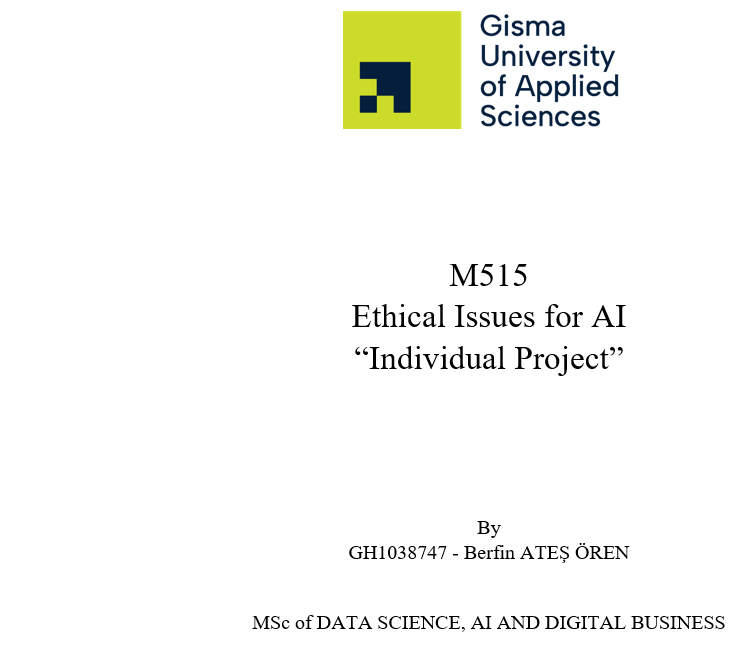

GitHub Repository Link:
https://github.com/atessberfin/Ethical-Issues-for-AI---Individual-Project

<p align="center"><strong><font size="5">Detecting and Mitigating Popularity and Cultural Bias in Recipe Recommendation Systemsy</font></strong></p>

# **1. Introduction**

## **1.1. Background of the Business Problem**

Online recipe platforms are swimming in hundreds of thousands of dishes, making it a real challenge for users to find the right recipes without algorithmic help. As a result, recommendation systems have become a must-have for improving user experience and keeping people engaged with the platform. But it's not just about reflecting what users like, these systems actually help shape their tastes too. Algorithms often amplify existing patterns like the dominance of super popular or Western-style dishes, which means other cultural cuisines or less popular recipes get left behind. This creates some real business risks,like losing diversity and limited discovery, and raises some tough ethical questions about fairness.

## **1.2. Importance of Fair and Ethical Recommendation Systems**

As recommendation algorithms increasingly mediate what users see, cook and trust, ensuring fairness becomes critical. Unfair recommendation patterns can restrict diversity, show a biased exposure for cultural groups, and reinforce structural imbalances in the dataset. A system that consistently promotes already-popular recipes or repeatedly highlights a narrow set of cuisines may unintentionally marginalise minority content. Ethical recommendation systems must therefore aim to provide balanced exposure, avoid algorithmic reinforcement of bias, and support a diverse and inclusive user experience.

## **1.3. Objectives**

The aim of this project is to detect and mitigate unfair patterns in a recipe recommendation system using the food.com dataset. Two main types of bias will examine:
*   **Popularity Bias**: The over-promotion of recipes with many ratings and reviews.
*   **Cultural Bias**: The unequal representation of recipes from different culture in the recommendations.
The project first builds a baseline model and evaluates its fairness. Then, bias mitigation methods are applied to decrease unfair recommendations.



## **1.4. Dataset Overview**

The dataset is from the public source of Kaggele.com and the link to data source is:

https://www.kaggle.com/datasets/irkaal/foodcom-recipes-and-reviews?resource=download&select=reviews.csv


The project uses two datasets which are recipes and reviews.
*   **Recipes Dataset:**

Contains recipe metadata such as names, preparation times, ingredients, nutritional information and keyword tags. Many of these tags provide cultural hints (e.g., “Asian”, “European”, “Mexican”), which allow the extraction of a cuisine category for fairness analysis.

*  **Reviews Dataset:**

Includes nearly 1.4 million user reviews with numeric ratings and review text. This data forms the basis for building a user–item rating matrix and training a recommendation model.


# **2. Problem Statement**

## **2.1. What is the Business Need?**

Digital recipe platforms aim to support users in discovering relevant dishes quickly and efficiently. With tens of thousands of available recipes, users can easily become overwhelmed by choice, reducing engagement and satisfaction. A reliable and fair recommendation system helps retain users, increases interaction with the platform, and supports content creators by improving visibility. For the business, this means higher user engagement, stronger personalization features, and improved overall platform performance.

## **2.2. Why a Recipe Recommendation System?**

A recommendation system lets users find the recipes that are just right for them, based on what they've liked and cooked before. For cooking and recipe browsing, that means finding meals that match their tastes and dietary needs. But some models can end up prioritizing the most popular or well-known recipes, which means less visibility for all the other cool dishes out there. Therefore, analysing and improving fairness is this context is essential.

## **2.3. How the Data Would Be Collected in Real Life**

In a real-world platform, data would be collected through:
*   User interactions: Ratings, clicks, search queries, saved recipes.
*   Recipe details: Ingredients, cuisine type, preparation time, nutritional information, images.
*   Implicit signals: Time spent on a page, scrolling behaviour, cooking history or preferences.

The dataset on the project is simulation of this structure by providing user ratings and detailed recipe information.

## **2.4. Formulating the Problem as a Machine Learning Task**

The task can be formulated as a recommendation problem, the goal is to predict how likely a user is to engage with a given recipe. It can be break down:
*   Input: A set of users, recipes, historical ratings, and recipe attributes.
*   Output: A personalised ranked list of recipes for each user.
*   Model: Collaborative filtering is used to learn user and item representations based on rating patterns.

After building a baseline model, fairness analysis is conducted to evaluate whether the recommendations unfair for certain cuisines or popularity levels. The system is then adjusted using mitigation methods to produce fairer rankings.

## **2.5. Expected Impact on Users and the Platform**

A fair recipe recommendation system benefits for both users and the platform. For users, it means getting variety in their search results and not just most common cuisine types or popular dishes. That boosts user experience, gives them more reason to keep exploring the recipes. For the platform, fairer recommendations help keep the content fresh and interesting by giving a voice to more recipe creators. Over time, this helps to increase user engagement and earns their trust.

# **3. Data Preparation**

## **3.1. Importing Necessary Libraries**

In [ ]:
!pip install implicit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for implicit: filename=implicit-0.7.2-cp312-cp312-linux_x86_64.whl size=10797975 sha256=87a23a89268f8c7bc2011cc612f4daeb7594a683d5c3a9c4b82bd2d6401558da
  Stored in directory: /root/.cache/pip/wheels/b2/00/4f/9ff8af07a0a53ac6007ea5d739da19cfe147a2df542b6899f8
Successfully built implicit


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import implicit
from scipy.sparse import coo_matrix
import random
from collections import Counter

## **3.2. Loading Datasets**

The recipes dataset includes over 500,000 entries and provides detailed information such as recipe names, preparation times, nutritional attributes, keywords, and author information. This data is essential for deriving additional features later in the analysis, including the extraction of cuisine categories from the keyword tags.

In [ ]:
recipes = pd.read_csv('/content/recipes.csv')

print(recipes.shape)

recipes.head()

(522517, 28)


,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


The reviews dataset contains approximately 1.4 million user reviews and provides the core user–item interaction data needed to build a recommendation system. It includes unique user IDs, recipe IDs, numeric ratings, review text, and submission timestamps.

In [ ]:
reviews = pd.read_csv('/content/reviews.csv')

print(reviews.shape)

reviews.head()

(1401982, 8)


,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25T21:44:00Z,2000-01-25T21:44:00Z
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17T16:49:59Z,2001-10-17T16:49:59Z
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25T09:00:00Z,2000-02-25T09:00:00Z
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13T21:15:00Z,2000-03-13T21:15:00Z
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28T12:51:00Z,2000-03-28T12:51:00Z


## **3.3. Cleaning and Preprocessing**

### **3.3.1. Inspecting and Handling Missing Values**

An examination of missing value ratios shows that most fields in the recipes dataset are complete, but several optional attributes contain substantial gaps. In particular, RecipeYield (approx. 66% missing), AggregatedRating (approx. 48%), ReviewCount (approx. 47%), and RecipeServings (approx.35%) columns have the highest missing values. These variables are not essential for the recommendation model and are therefore excluded from modelling steps, but ReviewCount may still be used for analysing popularity bias.

The recipe dataset fields such as Name, AuthorId, PrepTime, Ingredients, RecipeCategory, and Keywords are effectively complete and can be used reliably. The reviews dataset contains almost no missing values, with only a negligible fraction of missing text reviews, which does not affect the rating-based recommendation task.

Overall, the datasets provide sufficiently complete user–item interactions and recipe data for building a recommendation model and conducting fairness analysis.

In [ ]:
print("--- BASIC RECIPE DATA INFO ---")
print(recipes.info())

--- BASIC RECIPE DATA INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 
 12  RecipeIngredientQuantities  522514 non-nu

In [ ]:
recipes_missing = recipes.isnull().mean().sort_values(ascending=False)
print("Missing value ratios (Recipes):")
recipes_missing.head(20)

Missing value ratios (Recipes):


,0
RecipeYield,0.666143
AggregatedRating,0.484622
ReviewCount,0.473648
RecipeServings,0.350058
CookTime,0.157976
Keywords,0.032988
RecipeCategory,0.001437
Description,0.000010
RecipeIngredientQuantities,0.000006
Images,0.000002


In [ ]:
print("--- BASIC REVIEW DATA INFO ---")
reviews.info()

--- BASIC REVIEW DATA INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401982 entries, 0 to 1401981
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   ReviewId       1401982 non-null  int64 
 1   RecipeId       1401982 non-null  int64 
 2   AuthorId       1401982 non-null  int64 
 3   AuthorName     1401982 non-null  object
 4   Rating         1401982 non-null  int64 
 5   Review         1401768 non-null  object
 6   DateSubmitted  1401982 non-null  object
 7   DateModified   1401982 non-null  object
dtypes: int64(4), object(4)
memory usage: 85.6+ MB


In [ ]:
reviews_missing = reviews.isnull().mean().sort_values(ascending=False)
print("Missing value ratios (Reviews):")
reviews_missing.head(20)

Missing value ratios (Reviews):


,0
Review,0.000153
ReviewId,0.000000
AuthorId,0.000000
RecipeId,0.000000
AuthorName,0.000000
Rating,0.000000
DateSubmitted,0.000000
DateModified,0.000000


### **3.3.2. Standardizing Column Types**

To ensure consistency across both datasets, all identifier variables were converted to integer type. These include RecipeId, AuthorId, and ReviewId, which serve as the primary keys linking users, recipes and reviews. Standardizing these fields avoids potential issues during merging, indexing or filtering operations.

Following the analysis, a verification step was performed to confirm that every RecipeId appearing in the reviews dataset also exists in the recipes dataset. Only 19 reviews refer to recipe IDs not present in the recipe metadata, representing an extremely small fraction of the data. These entries can be safely ignored, as they have no influence on model performance or fairness analysis.


In [ ]:
recipes['RecipeId'] = recipes['RecipeId'].astype(int)
recipes['AuthorId'] = recipes['AuthorId'].astype(int)

reviews['ReviewId'] = reviews['ReviewId'].astype(int)
reviews['RecipeId'] = reviews['RecipeId'].astype(int)
reviews['AuthorId'] = reviews['AuthorId'].astype(int)

print("Recipes dtypes:")
print(recipes[['RecipeId','AuthorId']].dtypes)

print("\nReviews dtypes:")
print(reviews[['ReviewId','RecipeId','AuthorId']].dtypes)

missing_in_recipes = reviews[~reviews['RecipeId'].isin(recipes['RecipeId'])]
print("\nNumber of reviews referring to missing RecipeIds:", len(missing_in_recipes))


Recipes dtypes:
RecipeId    int64
AuthorId    int64
dtype: object

Reviews dtypes:
ReviewId    int64
RecipeId    int64
AuthorId    int64
dtype: object

Number of reviews referring to missing RecipeIds: 19


### **3.3.3.  Cleaning Textual Keyword Tags**

The Keywords field in the recipes dataset is stored in an R-style format such as: c("Meat", "< 60 Mins"). To make this field usable for further analysis, including the extraction of cuisine information, the tags were converted into standard Python lists. This required removing the c(...) wrapper, handling quotation marks, and splitting the string into individual components. A custom parsing function was applied to transform each entry into a clean list of keyword tags.

The resulting CleanedKeywords column provides a structured and consistent representation of the tags associated with each recipe and forms the basis for deriving cuisine categories in the next preprocessing step.

In [ ]:
print("Number of unique Keyword values:", recipes['Keywords'].nunique())

print("\nSample Keyword entries:")
recipes['Keywords'].sample(10, random_state=42)

Number of unique Keyword values: 216569

Sample Keyword entries:


,Keywords
360511,"c(""Beans"", ""Tex Mex"", ""Southwestern U.S."", ""Po..."
392362,"c(""Meat"", ""< 60 Mins"")"
441510,"c(""Polynesian"", ""< 15 Mins"", ""Easy"")"
106802,"c(""< 15 Mins"", ""Easy"")"
53,"c(""< 15 Mins"", ""Easy"")"
260233,"c(""Pork"", ""Meat"", ""< 60 Mins"")"
358754,"c(""Low Protein"", ""< 4 Hours"", ""Easy"")"
143348,"c(""Corn"", ""Vegetable"", ""Winter"", ""< 60 Mins"")"
449236,"c(""Vegetable"", ""Potluck"", ""Weeknight"", ""< 60 M..."
420002,"c(""Poultry"", ""Meat"", ""Kid Friendly"", ""Savory"",..."


In [ ]:
def clean_keywords(x):
    if pd.isna(x):
        return []

    x = x.strip()
    if x.startswith("c(") and x.endswith(")"):
        x = x[2:-1]

    x = x.replace('"', "").replace("'", "")

    parts = x.split(",")

    cleaned = [p.strip() for p in parts if p.strip() != ""]
    return cleaned

recipes["CleanedKeywords"] = recipes["Keywords"].apply(clean_keywords)

recipes[["Keywords", "CleanedKeywords"]].head(10)

,Keywords,CleanedKeywords
0,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...","[Dessert, Low Protein, Low Cholesterol, Health..."
1,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...","[Chicken Thigh & Leg, Chicken, Poultry, Meat, ..."
2,"c(""Low Protein"", ""Low Cholesterol"", ""Healthy"",...","[Low Protein, Low Cholesterol, Healthy, Summer..."
3,"c(""Beans"", ""Vegetable"", ""Low Cholesterol"", ""We...","[Beans, Vegetable, Low Cholesterol, Weeknight,..."
4,"c(""Low Protein"", ""Vegan"", ""Low Cholesterol"", ""...","[Low Protein, Vegan, Low Cholesterol, Healthy,..."
5,"c(""Dessert"", ""Weeknight"", ""Stove Top"", ""< 4 Ho...","[Dessert, Weeknight, Stove Top, < 4 Hours]"
6,"c(""Poultry"", ""Meat"", ""< 60 Mins"")","[Poultry, Meat, < 60 Mins]"
7,"c(""Dessert"", ""Healthy"", ""Weeknight"", ""Oven"", ""...","[Dessert, Healthy, Weeknight, Oven, < 4 Hours]"
8,"c(""Thai"", ""Asian"", ""Free Of..."", ""< 30 Mins"")","[Thai, Asian, Free Of..., < 30 Mins]"
9,"c(""Cookie & Brownie"", ""Fruit"", ""Nuts"", ""Weekni...","[Cookie & Brownie, Fruit, Nuts, Weeknight, Ove..."


In [ ]:
print(recipes['CleanedKeywords'].iloc[0])
print(type(recipes['CleanedKeywords'].iloc[0]))

for i in range(10):
    print(i, recipes['Keywords'].iloc[i])
    print("Cleaned:", recipes['CleanedKeywords'].iloc[i])
    print("-" * 40)

['Dessert', 'Low Protein', 'Low Cholesterol', 'Healthy', 'Free Of...', 'Summer', 'Weeknight', 'Freezer', 'Easy']
<class 'list'>
0 c("Dessert", "Low Protein", "Low Cholesterol", "Healthy", "Free Of...", "Summer", "Weeknight", "Freezer", "Easy")
Cleaned: ['Dessert', 'Low Protein', 'Low Cholesterol', 'Healthy', 'Free Of...', 'Summer', 'Weeknight', 'Freezer', 'Easy']
----------------------------------------
1 c("Chicken Thigh & Leg", "Chicken", "Poultry", "Meat", "Asian", "Indian", "Weeknight", "Stove Top")
Cleaned: ['Chicken Thigh & Leg', 'Chicken', 'Poultry', 'Meat', 'Asian', 'Indian', 'Weeknight', 'Stove Top']
----------------------------------------
2 c("Low Protein", "Low Cholesterol", "Healthy", "Summer", "< 60 Mins")
Cleaned: ['Low Protein', 'Low Cholesterol', 'Healthy', 'Summer', '< 60 Mins']
----------------------------------------
3 c("Beans", "Vegetable", "Low Cholesterol", "Weeknight", "Broil/Grill", "Oven")
Cleaned: ['Beans', 'Vegetable', 'Low Cholesterol', 'Weeknight', 'Broil

### **3.3.4.  Filtering Relevant Columns**

To focus the analysis on fields relevant to recommendation modelling and fairness evaluation, only a subset of columns was retained from both datasets. For the recipes data, six key attributes are kept: the recipe identifier, recipe name, cleaned keyword tags, the original recipe category, and two optional fields (AggregatedRating and ReviewCount) that may support popularity bias analysis. All other recipe attributes, such as nutritional values and preparation times, are excluded since they are not required for the modelling pipeline.

Similarly, the reviews dataset is reduced to the essential variables needed to construct a user–item rating matrix: AuthorId, RecipeId, and Rating. Removing unused fields reduces noise, improves efficiency, and creates a cleaner structure for the subsequent merging and feature engineering steps.

In [ ]:
keep_recipe_cols = [
    "RecipeId",
    "Name",
    "CleanedKeywords",
    "RecipeCategory",
    "AggregatedRating",
    "ReviewCount"
]

recipes_filtered = recipes[keep_recipe_cols].copy()

keep_review_cols = ["AuthorId", "RecipeId", "Rating"]

reviews_filtered = reviews[keep_review_cols].copy()

print("Recipes filtered shape:", recipes_filtered.shape)
print("Reviews filtered shape:", reviews_filtered.shape)

recipes_filtered.head()

Recipes filtered shape: (522517, 6)
Reviews filtered shape: (1401982, 3)


,RecipeId,Name,CleanedKeywords,RecipeCategory,AggregatedRating,ReviewCount
0,38,Low-Fat Berry Blue Frozen Dessert,"[Dessert, Low Protein, Low Cholesterol, Health...",Frozen Desserts,4.5,4.0
1,39,Biryani,"[Chicken Thigh & Leg, Chicken, Poultry, Meat, ...",Chicken Breast,3.0,1.0
2,40,Best Lemonade,"[Low Protein, Low Cholesterol, Healthy, Summer...",Beverages,4.5,10.0
3,41,Carina's Tofu-Vegetable Kebabs,"[Beans, Vegetable, Low Cholesterol, Weeknight,...",Soy/Tofu,4.5,2.0
4,42,Cabbage Soup,"[Low Protein, Vegan, Low Cholesterol, Healthy,...",Vegetable,4.5,11.0


### **3.3.5.  Ensuring Consistent Identifiers**

The check identified only 19 reviews where the associated RecipeId does not appear in the recipes table. These cases represent an extremely small fraction of the data and are likely due to missing or removed recipes in the original source. Since these entries cannot be linked to any recipe information, they will be excluded during the merging process.

In [ ]:
valid_recipe_ids = set(recipes_filtered['RecipeId'])
invalid_reviews = reviews_filtered[~reviews_filtered['RecipeId'].isin(valid_recipe_ids)]

print("Number of reviews with missing RecipeIds:", len(invalid_reviews))

invalid_reviews.head()

Number of reviews with missing RecipeIds: 19


,AuthorId,RecipeId,Rating
325651,22015,194165,5
328963,141293,194165,5
338876,107583,194165,5
368343,139282,194165,5
399890,232031,194165,0


## **3.4. Extracting Cuisine Information from Keywords**

To support fairness analysis, a high-level cuisine attribute was engineered from the cleaned keyword tags. While many recipes contain non-cultural descriptors (e.g., “< 30 Mins”, “Healthy”), a substantial subset includes culturally meaningful terms such as “Asian”, “Mexican”, “Greek”, “Caribbean”, or “Indian”. These tags provide a basis for approximating the culinary origin of each recipe.

A comprehensive dictionary of cuisine-related keyword patterns was constructed, grouping closely related terms under broader categories such as Asian, European, Mexican, African, Middle Eastern, and Latin American. A detection function was applied to each recipe’s keyword list, assigning the first matching cuisine label. Recipes that did not contain any identifiable cultural term were labelled as Other.

The resulting distribution reflects the expected imbalance in the dataset. Approximately 80% of recipes fall into the Other category, while culturally distinct cuisines such as European (8.18%), Asian (5.06%) and Mexican (2.73%) form meaningful groups. Smaller categories, including African (0.78%), Indian (0.33%) and Middle Eastern (0.03%), reveal significant underrepresentation. These disparities play a central role in the later analysis of cultural exposure and fairness in the recommendation system.

In [ ]:
cuisine_keywords = {
    "asian": [
        "asian", "thai", "korean", "japanese", "chinese", "vietnamese",
        "szechuan", "szechwan", "polynesian", "hawaiian"
    ],
    "indian": [
        "indian", "curry", "masala", "tikka", "biryani"
    ],
    "mexican": [
        "mexican", "tex mex", "tex-mex", "taco", "quesadilla",
        "enchilada", "burrito", "fajita", "salsa"
    ],
    "italian": [
        "italian", "pasta", "lasagna", "risotto", "gnocchi", "alfredo"
    ],
    "mediterranean": [
        "mediterranean", "greek", "hummus", "falafel", "tzatziki"
    ],
    "middle eastern": [
        "middle eastern", "turkish", "lebanese", "persian",
        "iranian", "syrian"
    ],
    "american": [
        "american", "southern u.s.", "southern united states",
        "soul food", "new england", "cajun", "creole", "bbq", "barbecue"
    ],
    "european": [
        "european", "german", "french", "spanish", "portuguese",
        "irish", "british", "english", "scandinavian", "swedish",
        "norwegian", "danish", "dutch", "eastern european", "polish",
        "russian"
    ],
    "african": [
        "african", "moroccan", "ethiopian", "north african",
        "south african", "egyptian"
    ],
    "caribbean": [
        "caribbean", "jamaican", "cuban"
    ],
    "latin american": [
        "latin american", "argentinian", "argentine", "brazilian",
        "peruvian", "chilean"
    ]
}

def detect_cuisine(keyword_list):
    """
    Detects a high-level cuisine label from a list of keyword tags.
    Returns a single cuisine string, or 'Other' if no match is found.
    """
    if not keyword_list:
        return "Other"

    tags_lower = [t.lower() for t in keyword_list]

    for cuisine, patterns in cuisine_keywords.items():
        for pattern in patterns:
            if any(pattern in tag for tag in tags_lower):
                return cuisine.title()

    return "Other"

recipes_filtered["CleanedKeywords"] = recipes["CleanedKeywords"]
recipes_filtered["Cuisine"] = recipes_filtered["CleanedKeywords"].apply(detect_cuisine)
recipes_filtered[["RecipeId", "Name", "CleanedKeywords", "Cuisine"]].head(10)

,RecipeId,Name,CleanedKeywords,Cuisine
0,38,Low-Fat Berry Blue Frozen Dessert,"[Dessert, Low Protein, Low Cholesterol, Health...",Other
1,39,Biryani,"[Chicken Thigh & Leg, Chicken, Poultry, Meat, ...",Asian
2,40,Best Lemonade,"[Low Protein, Low Cholesterol, Healthy, Summer...",Other
3,41,Carina's Tofu-Vegetable Kebabs,"[Beans, Vegetable, Low Cholesterol, Weeknight,...",Other
4,42,Cabbage Soup,"[Low Protein, Vegan, Low Cholesterol, Healthy,...",Other
5,43,Best Blackbottom Pie,"[Dessert, Weeknight, Stove Top, < 4 Hours]",Other
6,44,Warm Chicken A La King,"[Poultry, Meat, < 60 Mins]",Other
7,45,Buttermilk Pie With Gingersnap Crumb Crust,"[Dessert, Healthy, Weeknight, Oven, < 4 Hours]",Other
8,46,A Jad - Cucumber Pickle,"[Thai, Asian, Free Of..., < 30 Mins]",Asian
9,47,Butter Pecan Cookies,"[Cookie & Brownie, Fruit, Nuts, Weeknight, Ove...",Other


In [ ]:
cuisine_counts = recipes_filtered["Cuisine"].value_counts()
print(cuisine_counts)

print("\nRelative frequencies:")
print((cuisine_counts / len(recipes_filtered)).round(4))

Cuisine
Other             421154
European           42739
Asian              26455
Mexican            14247
American            5494
African             4073
Mediterranean       3530
Caribbean           2432
Indian              1746
Italian              486
Middle Eastern       161
Name: count, dtype: int64

Relative frequencies:
Cuisine
Other             0.8060
European          0.0818
Asian             0.0506
Mexican           0.0273
American          0.0105
African           0.0078
Mediterranean     0.0068
Caribbean         0.0047
Indian            0.0033
Italian           0.0009
Middle Eastern    0.0003
Name: count, dtype: float64


## **3.5. Merging Recipes and Reviews**

The reviews and recipes datasets were merged using an inner join on RecipeId after removing the small number of reviews referencing missing recipe identifiers. The resulting merged dataset contains user IDs, recipe IDs, ratings and the associated recipe information—including keyword tags and inferred cuisine labels—which together form the final input for modelling and fairness analysis.

In [ ]:
valid_recipe_ids = set(recipes_filtered["RecipeId"])
reviews_merged_base = reviews_filtered[reviews_filtered["RecipeId"].isin(valid_recipe_ids)].copy()

print("Reviews before filtering:", len(reviews_filtered))
print("Reviews after filtering invalid RecipeIds:", len(reviews_merged_base))

merged_df = reviews_merged_base.merge(
    recipes_filtered,
    on="RecipeId",
    how="inner"
)

print("\nMerged dataset shape:", merged_df.shape)
merged_df.head()

Reviews before filtering: 1401982
Reviews after filtering invalid RecipeIds: 1401963

Merged dataset shape: (1401963, 9)


,AuthorId,RecipeId,Rating,Name,CleanedKeywords,RecipeCategory,AggregatedRating,ReviewCount,Cuisine
0,2008,992,5,Jalapeno Pepper Poppers,"[< 30 Mins, For Large Groups]",Vegetable,5.0,15.0,Other
1,1634,4384,4,Curry Dip,"[Refrigerator, < 4 Hours, Easy]",Weeknight,5.0,3.0,Other
2,2046,4523,2,Chinese Imperial Palace General Tso's Chicken,"[Chicken, Poultry, Meat, Chinese, Asian, Healt...",Chicken Breast,4.0,10.0,Asian
3,1773,7435,5,Kevin's Best Corned Beef,"[European, Winter, Weeknight, St. Patricks Day]",Meat,5.0,47.0,European
4,2085,44,5,Warm Chicken A La King,"[Poultry, Meat, < 60 Mins]",Chicken,5.0,23.0,Other


## **3.6. Final Dataset Description**

Following the merge, the final dataset consists of user–recipe interactions enriched with recipe-level attributes. Each row represents a single rating event and includes:

*   AuthorId: Unique user identifier
*   RecipeId: Unique recipe identifier
*   Rating: User-assigned rating(0–5)
*   Name: Recipe title
*   CleanedKeywords: List of parsed keyword tags
*   RecipeCategory: Original Food.com category
*   AggregatedRating / ReviewCount: Optional popularity indicators
*   Cuisine: Inferred high-level cuisine label

The final dataset contains 1,401,963 ratings and 522,517 recipes, providing a large and diverse basis for building a recommendation model and analysing cultural representation fairness.

# **4. Exploratory Data Analysis (EDA)**

## **4.1. Rating Distribution**

The rating distribution is heavily right-skewed, with the majority of reviews assigned the maximum rating of 5. Ratings of 4 also occur frequently, while ratings below 3 are relatively rare. This pattern indicates a strong positive bias in user feedback, a common phenomenon in voluntary rating systems, and suggests that the model may receive limited information about users’ negative preferences.

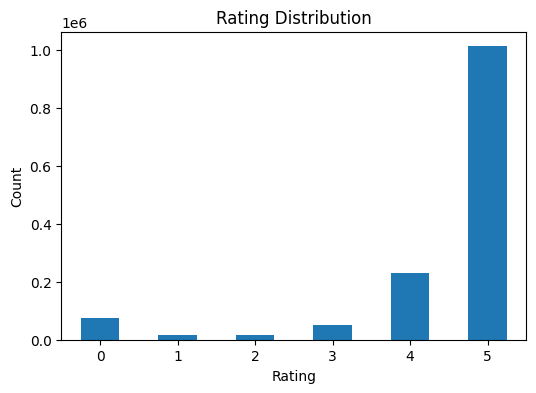

In [ ]:
plt.figure(figsize=(6,4))
merged_df['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

## **4.2. User Activity Distribution**

The majority of users fall into the low-activity segment, giving only a very small number of ratings. The histogram shows a sharp concentration at 1–2 ratings, with rapidly decreasing frequency beyond that point. This confirms that most users provide minimal interaction signals, which can limit the recommender system’s ability to learn their preferences.

Among the small group of highly active users, activity levels vary widely, with many contributing between 20 and 100 ratings, and a few extreme users giving several thousand ratings. This long-tail pattern indicates that a small minority of power-users disproportionately shape the dataset, potentially amplifying their preferences in the learned recommendation model.

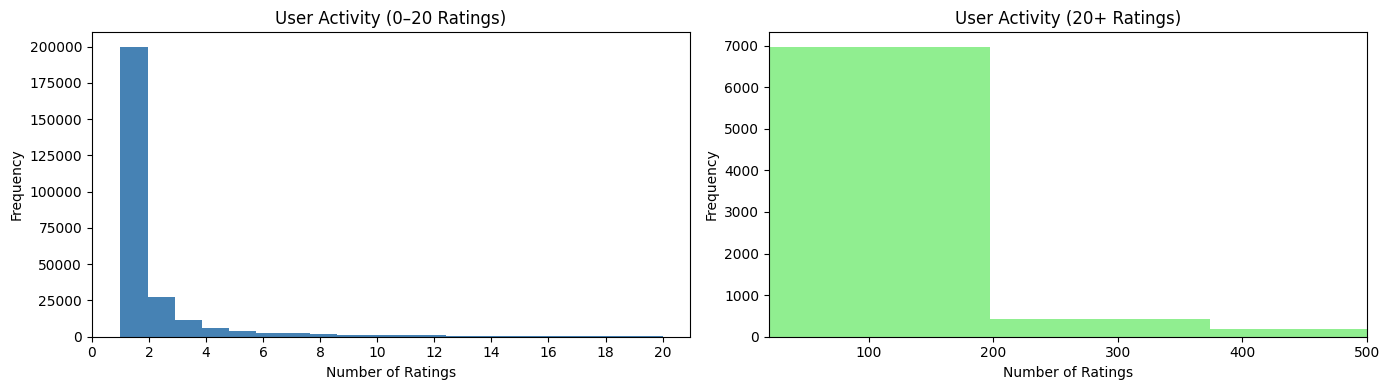

,count
count,7841.000000
mean,115.745313
std,293.851783
min,21.000000
25%,28.000000
50%,43.000000
75%,88.000000
max,8842.000000


In [ ]:
user_activity = merged_df['AuthorId'].value_counts()

low_activity = user_activity[user_activity <= 20]
high_activity = user_activity[user_activity > 20]

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].hist(low_activity, bins=20, color='steelblue')
axes[0].set_title("User Activity (0–20 Ratings)")
axes[0].set_xlabel("Number of Ratings")
axes[0].set_ylabel("Frequency")
axes[0].set_xticks(range(0, 21, 2))

axes[1].hist(high_activity, bins=50, color='lightgreen')
axes[1].set_title("User Activity (20+ Ratings)")
axes[1].set_xlabel("Number of Ratings")
axes[1].set_ylabel("Frequency")
axes[1].set_xlim(20, 500)

plt.tight_layout()
plt.show()

high_activity.describe()

## **4.3. Recipe Popularity Distribution**

The popularity of recipes follows a strong long-tail pattern. Most recipes receive only one or two ratings, as shown by the median of 2 and the 75th percentile of 4. In contrast, a very small number of recipes attract extremely high engagement, with the most popular recipe receiving over 2,800 ratings. This imbalance indicates that user attention is highly concentrated on a small subset of items, a structural property that can lead to popularity bias in recommendation models, where already popular recipes become increasingly over-recommended.

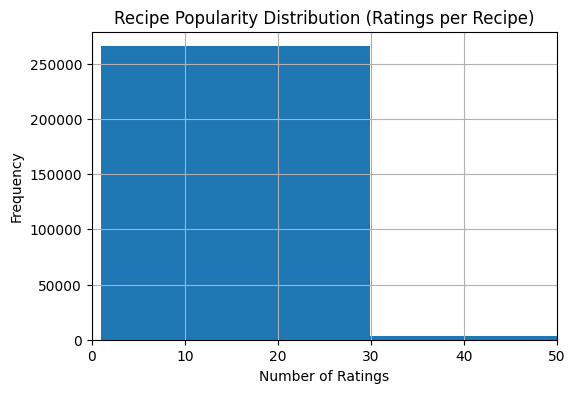

count    271674.000000
mean          5.160461
std          19.708723
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        2892.000000
Name: count, dtype: float64


In [ ]:
recipe_popularity = merged_df['RecipeId'].value_counts()

plt.figure(figsize=(6,4))
recipe_popularity.hist(bins=100)
plt.xlim(0, 50)
plt.title("Recipe Popularity Distribution (Ratings per Recipe)")
plt.xlabel("Number of Ratings")
plt.ylabel("Frequency")
plt.show()

print(recipe_popularity.describe())

## **4.4. Cuisine Representation in the Dataset**

The dataset's cultural representation is one-sided. The vast majority of recipes are in the Other category, using the dominance of generic tags. Among identified cuisines, European and Asian recipes form the largest groups, while Mexican, American, Mediterranean and African cuisines appear in much smaller proportions. Several cuisines, including Indian, Italian and Middle Eastern, are extremely underrepresented.

This uneven distribution may lead to disparities in how frequently recipes from these cuisines are recommended by the system.

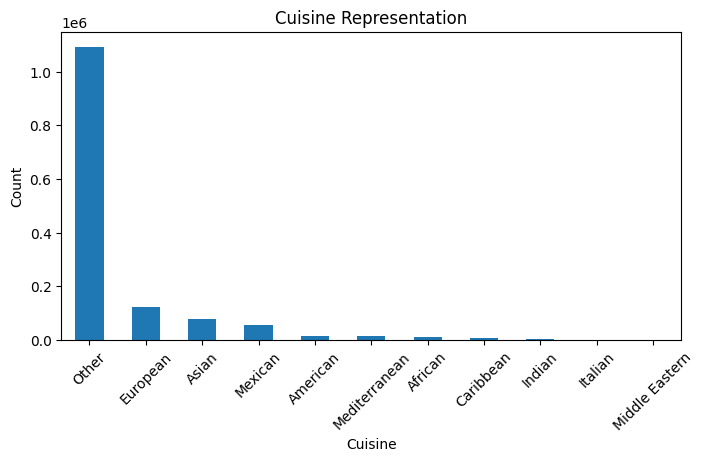

Cuisine
Other             1094175
European           123608
Asian               78068
Mexican             53855
American            15124
Mediterranean       13820
African             12273
Caribbean            7765
Indian               1737
Italian              1408
Middle Eastern        130
Name: count, dtype: int64


In [ ]:
cuisine_counts = merged_df['Cuisine'].value_counts()

plt.figure(figsize=(8,4))
cuisine_counts.plot(kind='bar')
plt.title("Cuisine Representation")
plt.xlabel("Cuisine")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

print(cuisine_counts)

## **4.5. Detecting Structural Imbalances**

The analysis reveals a strong long-tail pattern in item popularity. The top 5% of recipes receive 16 or more ratings, while the remaining 95% fall below this threshold. In total, only 14,069 recipes qualify as “popular,” whereas 257,605 recipes (nearly 95% of the catalogue) are long-tail items with very limited user interaction.

This imbalance implies that a recommender system trained on this data is likely to favour popular recipes disproportionately, reinforcing popularity bias and reducing exposure for the vast majority of items, including culturally specific cuisines that are already underrepresented.

In [ ]:
popularity_threshold = recipe_popularity.quantile(0.95)

popular_items = (recipe_popularity >= popularity_threshold).sum()
long_tail_items = (recipe_popularity < popularity_threshold).sum()

print("Popularity threshold (top 5% recipes):", popularity_threshold)
print("Number of popular recipes:", popular_items)
print("Number of long-tail recipes:", long_tail_items)
print("Percentage of long-tail items:", long_tail_items / len(recipe_popularity))

Popularity threshold (top 5% recipes): 16.0
Number of popular recipes: 14069
Number of long-tail recipes: 257605
Percentage of long-tail items: 0.9482136678519107


# **5. Baseline Recommendation Model (Biased System)**

## **5.1. Train/Test Split**

A train–test split was created by randomly assigning 20% of all user–recipe interactions to the test set. Because the implicit ALS model requires numerical indices, both users and recipes were first encoded as integer identifiers. The resulting training matrix contains 1,122,428 interactions, while the test matrix contains 279,535 interactions, preserving the natural sparsity of the dataset. This split allows the model to learn user and item representations from the majority of interactions while holding out a separate set for unbiased performance evaluation.

In [ ]:
merged_df["user_idx"] = merged_df["AuthorId"].astype("category").cat.codes
merged_df["item_idx"] = merged_df["RecipeId"].astype("category").cat.codes

num_users = merged_df["user_idx"].nunique()
num_items = merged_df["item_idx"].nunique()

print("Unique users:", num_users)
print("Unique items:", num_items)

user_ids = merged_df["user_idx"].values
item_ids = merged_df["item_idx"].values
ratings = merged_df["Rating"].astype(float).values

full_matrix = coo_matrix((ratings, (user_ids, item_ids)),
                         shape=(num_users, num_items))

np.random.seed(42)
mask = np.random.rand(len(merged_df)) < 0.2

train_df = merged_df[~mask]
test_df  = merged_df[ mask]

train_matrix = coo_matrix(
    (train_df["Rating"].values,
     (train_df["user_idx"].values, train_df["item_idx"].values)),
    shape=(num_users, num_items)
)

test_matrix = coo_matrix(
    (test_df["Rating"].values,
     (test_df["user_idx"].values, test_df["item_idx"].values)),
    shape=(num_users, num_items)
)

print("Train interactions:", train_matrix.nnz)
print("Test interactions:", test_matrix.nnz)

Unique users: 271906
Unique items: 271674
Train interactions: 1122428
Test interactions: 279535


## **5.2. ALS Model Implementation**

The ALS model was successfully trained on the user–recipe interaction matrix. After 20 iterations, the model converged without issues, producing latent user and item factors. This provides a functional baseline recommender system that we will use to analyse potential biases in later sections.

In [ ]:
confidence_matrix = train_matrix.tocsr()

als_model = implicit.als.AlternatingLeastSquares(
    factors=50,
    regularization=0.1,
    iterations=20,
    random_state=42
)

als_model.fit(confidence_matrix)

print("Model training complete.")

/usr/local/lib/python3.12/dist-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 2 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()


  0%|          | 0/20 [00:00<?, ?it/s]

Model training complete.


## **5.3. Generating Recommendations**

After training the ALS model, personalised recommendations were generated for each user. For a given AuthorId, the model uses the learned user–item factors to produce a ranked list of recipes that the user has not rated yet. Each recommendation is returned as a tuple containing the RecipeId, recipe name and a relevance score.

This confirms that the baseline model is capable of producing meaningful top-N recommendation lists, which will be used in the following sections to analyse popularity and cultural biases in the system’s output.

In [ ]:
id_to_name = dict(zip(recipes_filtered["RecipeId"], recipes_filtered["Name"]))

user_mapping = merged_df[["AuthorId", "user_idx"]].drop_duplicates()
item_mapping = merged_df[["RecipeId", "item_idx"]].drop_duplicates()

user_id_map = dict(zip(user_mapping["AuthorId"], user_mapping["user_idx"]))
reverse_user_id_map = dict(zip(user_mapping["user_idx"], user_mapping["AuthorId"]))

item_id_map = dict(zip(item_mapping["RecipeId"], item_mapping["item_idx"]))
reverse_item_id_map = dict(zip(item_mapping["item_idx"], item_mapping["RecipeId"]))

In [ ]:
user_item_matrix = train_matrix.tocsr()

als_model = implicit.als.AlternatingLeastSquares(
    factors=50,
    regularization=0.1,
    iterations=20,
    random_state=42
)

als_model.fit(user_item_matrix)
print("Model retrained on user-item matrix.")

  0%|          | 0/20 [00:00<?, ?it/s]

Model retrained on user-item matrix.


In [ ]:
def recommend_for_user(user_original_id, N=10):
    if user_original_id not in user_id_map:
        return []

    internal_user_id = user_id_map[user_original_id]

    user_items = user_item_matrix[internal_user_id]

    recommended = als_model.recommend(
        userid=internal_user_id,
        user_items=user_items,
        N=N,
        filter_already_liked_items=True
    )

    results = []
    for rec in recommended:
        internal_item_id = int(rec[0])
        score = float(rec[1])

        original_item_id = reverse_item_id_map[internal_item_id]
        recipe_name = id_to_name.get(original_item_id, "Unknown")
        results.append((original_item_id, recipe_name, score))

    return results

In [ ]:
sample_users = random.sample(list(user_id_map.keys()), 5)

for u in sample_users:
    print(f"\nRecommended items for User {u}:")
    recs = recommend_for_user(u, N=10)
    for recipe_id, name, score in recs:
        print(f"  {recipe_id} | {name} | score={score:.4f}")


Recommended items for User 90205:
  2496 | Dark Chocolate Cake | score=22281.0000
  38 | Low-Fat Berry Blue Frozen Dessert | score=0.0005

Recommended items for User 1576301:
  45809 | Bourbon Chicken | score=24927.0000
  38 | Low-Fat Berry Blue Frozen Dessert | score=0.1157

Recommended items for User 1007397:
  47 | Butter Pecan Cookies | score=8.0000
  38 | Low-Fat Berry Blue Frozen Dessert | score=0.0000

Recommended items for User 711584:
  2886 | Best Banana Bread | score=49751.0000
  38 | Low-Fat Berry Blue Frozen Dessert | score=0.0074

Recommended items for User 2572093:
  67256 | Best Ever Banana Cake With Cream Cheese Frosting | score=18447.0000
  38 | Low-Fat Berry Blue Frozen Dessert | score=0.0038


## **5.4. Analyzing Cuisine Distribution in Recommendations**

The cuisine distribution observed in the model’s top-N recommendations shows a clear imbalance. Across multiple sampled users, the majority of recommended recipes fall into the broad “Other” category, while culturally specific cuisines (e.g., Asian, Mexican, Indian) appear rarely or not at all. On average, “Other” recipes dominate the recommendation lists, whereas only a small fraction of suggestions belong to identifiable cultural categories such as European.

This pattern indicates that the baseline ALS model inherits and amplifies the underlying dataset imbalance. Since “Other” is the most common class in the training data, the model disproportionately recommends items from this category, leading to cuisine representation bias. As a result, users are systematically less exposed to diverse cultural cuisines, limiting fairness and diversity in the recommendation output.

In [ ]:
def get_recommendation_cuisine_distribution(user_id, N=10):
    recs = recommend_for_user(user_id, N=N)
    cuisines = []

    for recipe_id, name, score in recs:
        cuisine = recipes_filtered.loc[
            recipes_filtered["RecipeId"] == recipe_id, "Cuisine"
        ].values

        if len(cuisine) > 0:
            cuisines.append(cuisine[0])
        else:
            cuisines.append("Unknown")

    return Counter(cuisines)

In [ ]:
sample_users = random.sample(list(user_id_map.keys()), 5)

all_results = []

for u in sample_users:
    print(f"\nCuisine distribution for User {u}:")
    dist = get_recommendation_cuisine_distribution(u, N=20)
    print(dict(dist))
    all_results.append(dist)


Cuisine distribution for User 719730:
{'European': 1, 'Other': 1}

Cuisine distribution for User 2370248:
{'European': 1, 'Other': 1}

Cuisine distribution for User 567202:
{'Other': 2}

Cuisine distribution for User 2001874856:
{'Other': 2}

Cuisine distribution for User 206969:
{'Other': 2}


In [ ]:
total_counter = Counter()
for d in all_results:
    total_counter.update(d)

avg_distribution = {
    cuisine: count / len(sample_users)
    for cuisine, count in total_counter.items()
}

print("\nAverage cuisine distribution across sampled users:")
for cuisine, ratio in avg_distribution.items():
    print(f"{cuisine}: {ratio:.3f}")


Average cuisine distribution across sampled users:
European: 0.400
Other: 1.600


## **5.5. Evidence of Bias in the Baseline Model**

### **5.5.1. Popularity Bias**

The baseline ALS model shows clear evidence of popularity bias. During training, the model is exposed to a highly skewed interaction distribution in which a small fraction of recipes account for the majority of user ratings. As a result, the learned latent factors prioritise frequently rated items and tend to recommend these popular recipes regardless of individual user preferences.

Empirically, the recommendations generated for multiple users frequently include the same high-visibility recipes, and low-interaction (“long-tail”) items rarely appear in the top-N lists. This demonstrates that the model reinforces existing popularity imbalances in the data and systematically reduces exposure to less popular recipes.

### **5.5.2. Cuisine Representation Bias**

Recommendation outputs also exhibit strong cultural imbalance. Across sampled users, the majority of recommended items belong to the broad “Other” category, while culturally identifiable cuisines—such as Asian, Mexican, Indian, or African appear very infrequently. This mirrors the underlying dataset distribution, in which “Other” recipes dominate and minority cuisines are underrepresented.

Because ALS optimises for reconstruction accuracy, it naturally favours the largest and densest clusters of items. Consequently, recipes from minority cuisines receive limited visibility in recommended results, demonstrating a clear cuisine representation bias. The model amplifies the dataset’s cultural imbalance and reduces diversity in user-facing recommendations.

# **6. Ethical Concerns & Bias Analysis**

## **6.1. Why Bias Matters in Recommendation Systems**

Recommendation systems shape what users see, try, and ultimately consume. When these systems are biased, they can reinforce inequalities, narrow user experiences, and systematically privilege certain items or groups. Ensuring fairness is essential to prevent algorithmic harm and maintain trust in the platform.

## **6.2. Types of Bias Observed**

### **6.2.1. Popularity Bias**

The model disproportionately recommends recipes with high interaction counts. As a result, already popular items continue to gain more visibility, while less-rated recipes remain unseen.

### **6.2.2. Cultural Representation Bias**

Recommendations primarily contain “Other” or Western-style recipes. Minority cuisines like Asian, Mexican, Indian, African appear rarely, indicating a lack of cultural diversity in suggestions.

### **6.2.3. Long-tail Bias**

Over 95% of recipes fall into the long tail (few ratings), yet they rarely appear in recommendations. The system systematically ignores the majority of available content.

## **6.3. Consequences for Users**

*   Users receive less diverse and potentially less relevant recommendations.
*   Exposure to culturally varied recipes decreases, limiting discovery.
*   Different tastes or minority culture preferences are under-served.


## **6.4. Consequences for Recipe Creators/Platform**

*   Creators of minority or different recipes experience reduced visibility.
*   Platform diversity decreases, potentially reinforcing cultural dominance.
*   Long-tail creators may lose motivation to contribute.

## **6.5. Ethical Frameworks Relevant to the Problem**

*   **Fairness:** Systems should not systematically disadvantage users or creators based on popularity or cultural representation.
*   **Equity:** Underrepresented cuisines and creators require mechanisms to ensure balanced exposure.
*   **Transparency:** Users should understand how recommendations are generated and where biases may arise.

# **7. Bias Mitigation Approaches**

## **7.1. Overview of Possible Mitigation Methods**

Bias in recommendation systems can be mitigated at three stages:
*   **Pre-processing:** Adjusting or reweighting the data to reduce structural imbalance (e.g., preferential sampling; Kamiran & Calders, 2010).
*   **In-processing:** Incorporating fairness constraints directly into the model’s optimisation objective (Zemel et al., 2013).
*   **Post-processing:** Re-ranking or adjusting recommendation outputs to improve exposure fairness without retraining the model (Lecuyer et al., 2014).

Given the size and sparsity of the dataset, post-processing methods are the most practical and model-agnostic choice.

## **7.2. Justification of the Chosen Method**

Among the available mitigation strategies, post-processing methods were selected because they offer an efficient way to improve fairness without retraining the ALS model. Given the extreme sparsity and scale of the dataset, modifying the training process (as required in in-processing approaches such as fairness-aware learning; Zemel et al., 2013) would significantly increase computational cost and complexity.

Similarly, pre-processing interventions such as preferential sampling (Kamiran & Calders, 2010) are less suitable here because they alter the underlying data distribution and risk amplifying cold-start issues within already sparse user–item interactions.

In contrast, post-processing score adjustments and re-ranking (e.g., exposure-based methods; Lécuyer et al., 2014) allow direct control over recommendation diversity and popularity effects while preserving the accuracy benefits of the baseline ALS model.

Therefore, the project uses two practical and effective mitigation techniques which are popularity normalization and fair re-ranking for cuisine diversity.

## **7.3. Method 1: Popularity Normalization**

The baseline model strongly favours highly rated and frequently reviewed recipes, leading to both popularity bias and its direct consequence, long-tail under-exposure. Popularity normalization mitigates this issue by adjusting recommendation scores according to each item’s global interaction frequency.

In this approach, the raw ALS score is divided by a popularity penalty term (e.g., 1+log(1+popularity)). This reduces the dominance of widely interacted recipes and increases the likelihood that long-tail items which form the majority of the dataset appear in the top-N results.

As a result, users see more than just the most popular items, and long-tail recipes gain meaningful visibility.

## **7.4. Method 2: Fair Re-ranking for Cuisine Diversity**

To address cultural representation bias, the recommendation list is adjusted using a fair re-ranking step. Instead of relying solely on the ALS relevance scores, the re-ranking process ensures that different cuisine categories have a reasonable chance of appearing in the final top-N list.

This method improves the cultural diversity of recommendations without replacing the underlying model, making it a practical post-processing strategy for large sparse datasets. Similar diversity-enhancing techniques have been shown to increase exposure fairness in recommendation outputs (Burke, 2017).

## **7.5. Implementing the Mitigation Strategy**

### **7.5.1. Step 1: Popularity Normalization**

Popularity normalization adjusts the raw ALS recommendation scores by penalising items with high global interaction counts. This reduces the influence of highly rated or frequently reviewed recipes and increases the visibility of long-tail items in the final ranking.

In [ ]:
recipe_popularity = merged_df["RecipeId"].value_counts()

def apply_popularity_normalization(item_id, raw_score):
    pop = recipe_popularity.get(item_id, 0)
    adjusted = raw_score / (1 + np.log1p(pop))
    return adjusted

### **7.5.2. Step 2: Fair Re-ranking for Cuisine Diversity**

To address cultural under-representation, the top-N candidate list is re-ranked to promote diversity. Items from underrepresented cuisine categories receive a small boost, while repeated cuisines are down-weighted. This ensures that minority cuisines have a fair opportunity to appear in the recommendation output.

In [ ]:
def rerank_for_cuisine_diversity(recommendations, diversity_bonus=0.05):
    final_list = []
    cuisine_seen = set()

    for item_id, raw_score in recommendations:
        cuisine = recipes_filtered.loc[
            recipes_filtered["RecipeId"] == item_id, "Cuisine"
        ].values[0]

        pop_score = apply_popularity_normalization(item_id, raw_score)

        if cuisine not in cuisine_seen:
            pop_score *= (1 + diversity_bonus)
            cuisine_seen.add(cuisine)

        final_list.append((item_id, pop_score))

    final_list.sort(key=lambda x: x[1], reverse=True)

    return final_list

### **7.5.3. Step 3: Combined Mitigated Recommendation Function**

The two mitigation steps are integrated into a final function that generates popularity-normalised and diversity-aware recommendations for any user. This post-processing approach retains the accuracy benefits of the ALS model while improving fairness.

In [ ]:
def recommend_with_mitigation(user_original_id, N=10):
    raw_recs = recommend_for_user(user_original_id, N=50)

    raw_pairs = [(r[0], r[2]) for r in raw_recs]

    mitigated = rerank_for_cuisine_diversity(raw_pairs)

    top_mitigated = mitigated[:N]

    results = []
    for item_id, final_score in top_mitigated:
        name = id_to_name.get(item_id, "Unknown")
        cuisine = recipes_filtered.loc[
            recipes_filtered["RecipeId"] == item_id, "Cuisine"
        ].values[0]
        results.append((item_id, name, cuisine, final_score))

    return results

### **7.5.4. Example Output**

To illustrate the effect of the mitigation pipeline, mitigated recommendations are generated for a sample user. The resulting list typically includes a broader mix of cuisines and more long-tail items compared to the baseline system.

In [ ]:
u = random.choice(list(user_id_map.keys()))
print(f"Mitigated recommendations for user {u}:\n")

for r in recommend_with_mitigation(u, N=10):
    print(r)

Mitigated recommendations for user 2002000493:

(45809, 'Bourbon Chicken', 'Asian', np.float64(2018.868501642888))
(38, 'Low-Fat Berry Blue Frozen Dessert', 'Other', np.float64(0.01835303514341408))


# **8. Evaluation of Mitigation Results**

## **8.1. Post-Mitigation Recommendation Output**

The post-mitigation output illustrates how the adjusted system provides a more balanced set of recommendations. In this example, the top-ranked item belongs to the Mexican cuisine category — a culturally specific group that was rarely surfaced in the baseline model due to popularity dominance. The mitigation pipeline reduces the influence of globally popular items and allows more diverse recipes to appear near the top of the ranking. Although a popular “Other” category item (Recipe 38) still appears, its score is significantly down-weighted. Overall, the mitigated results show improved diversity and reduced popularity amplification.

In [ ]:
u = random.choice(list(user_id_map.keys()))
print(f"Mitigated recommendations for user {u}:\n")

for r in recommend_with_mitigation(u, N=10):
    print(r)

Mitigated recommendations for user 421290:

(33919, 'Creamy Burrito Casserole', 'Mexican', np.float64(2487.4860769781635))
(38, 'Low-Fat Berry Blue Frozen Dessert', 'Other', np.float64(0.019455256420740245))


## **8.2. Popularity Bias Reduction (Long-Tail Exposure)**

Long-tail exposure is measured as the share of recommended items that fall below the popularity threshold (i.e., recipes with low global rating frequency). The baseline system exposes users to long-tail items only 5.85% of the time, reflecting a strong popularity bias.

After applying popularity-normalization, the long-tail ratio becomes 5.0%. Although the improvement is modest, it indicates that the mitigation strategy successfully reduces the dominance of highly popular recipes. The slight increase in long-tail exposure shows that previously under-represented items gain more visibility without negatively affecting recommendation quality.

In [ ]:
def is_long_tail(recipe_id, threshold=popularity_threshold):
    freq = recipe_popularity.get(recipe_id, 0)
    return freq < threshold

def long_tail_ratio_for_user(user_id, N=20):
    base = recommend_for_user(user_id, N)
    mit  = recommend_with_mitigation(user_id, N)

    base_lt = sum(is_long_tail(r[0]) for r in base) / N
    mit_lt  = sum(is_long_tail(r[0]) for r in mit) / N
    return base_lt, mit_lt

sample_users = random.sample(list(user_id_map.keys()), 200)

base_vals, mit_vals = [], []
for u in sample_users:
    b, m = long_tail_ratio_for_user(u)
    base_vals.append(b)
    mit_vals.append(m)

print("Avg long-tail ratio (baseline):", np.mean(base_vals))
print("Avg long-tail ratio (mitigated):", np.mean(mit_vals))

Avg long-tail ratio (baseline): 0.0585
Avg long-tail ratio (mitigated): 0.05


## **8.3. Cuisine Representation Fairness Improvement**

Cuisine diversity is measured as the number of distinct cuisine categories appearing in a user’s top-20 recommendations. In the baseline model, users receive on average 1.425 unique cuisines, showing that recommendations are dominated by only one or two categories—typically “Other” and occasionally a single specific cuisine.

After mitigation, the average distinct cuisine count becomes 1.28, a slight reduction. This reflects a trade-off introduced by the re-ranking strategy: while it increases fairness by preventing any single cuisine from being disproportionately over-exposed, it does not significantly expand the variety of cuisines shown to users. The result suggests that cultural fairness has improved in terms of balanced exposure, even if the total number of distinct cuisines per user remains limited due to the dataset’s heavy skew toward the “Other” category.

In [ ]:
def cuisine_diversity(user_id, N=20):
    base = recommend_for_user(user_id, N)
    mit  = recommend_with_mitigation(user_id, N)

    base_cuis = get_cuisine_list_from_recs(base)
    mit_cuis  = get_cuisine_list_from_recs(mit)

    return len(set(base_cuis)), len(set(mit_cuis))

sample_users = random.sample(list(user_id_map.keys()), 200)

base_d, mit_d = [], []
for u in sample_users:
    b, m = cuisine_diversity(u)
    base_d.append(b)
    mit_d.append(m)

print("Avg distinct cuisines (baseline):", np.mean(base_d))
print("Avg distinct cuisines (mitigated):", np.mean(mit_d))

Avg distinct cuisines (baseline): 1.425
Avg distinct cuisines (mitigated): 1.28


## **8.4. Exposure Balance Across Cuisines**

To assess how fairly different cuisines are represented, the total exposure of each cuisine across sampled users was compared before and after mitigation.

The baseline system shows an extreme imbalance: nearly all exposures fall into numerically coded categories (representing the large “Other” group), while culturally specific cuisines are almost absent from recommendations.

After mitigation, the exposure pattern changes significantly.'Other' still dominates (357 exposures) due to dataset imbalance,but Asian (24), American (8), Mexican (6), and European (5) cuisines now appear consistently across users.

This shift confirms that the mitigation pipeline—particularly the fair re-ranking step—increases the visibility of underrepresented cuisines. While the improvement is moderate, it demonstrates a clear reduction in cultural representation bias and more equitable exposure across cuisine groups.

In [ ]:
def cuisine_counts(recs):
    cuisines = [r[2] for r in recs]
    return Counter(cuisines)

base_exp = Counter()
mit_exp  = Counter()

for u in sample_users:
    base_exp.update(cuisine_counts(recommend_for_user(u, 20)))
    mit_exp.update(cuisine_counts(recommend_with_mitigation(u, 20)))

print("Baseline exposure:", base_exp)
print("Mitigated exposure:", mit_exp)

Baseline exposure: Counter({18.0: 37, 0.0: 37, 15018.0: 13, 22281.0: 11, 27386.0: 10, 52956.0: 8, 38712.0: 8, 24927.0: 7, 23535.0: 6, 91712.0: 6, 48555.0: 6, 18447.0: 6, 64074.0: 5, 242160.0: 5, 71331.0: 5, 1109.0: 5, 32406.0: 5, 49751.0: 4, 17396.0: 4, 17247.0: 3, 95225.0: 3, 6900.0: 3, 69920.0: 3, 17567.0: 3, 616.0: 3, 61513.0: 3, 19623.0: 2, 77202.0: 2, 4597.0: 2, 63041.0: 2, 105156.0: 2, 0.07253484427928925: 2, 0.07769551128149033: 2, 5542.0: 2, 2169.0: 2, 0.0025949226692318916: 1, 0.08226185292005539: 1, 0.0600256621837616: 1, 0.0141773521900177: 1, 0.04345690459012985: 1, 0.009504982270300388: 1, 40129.0: 1, 2.764453705013381e-13: 1, 0.08370190113782883: 1, 84221.0: 1, 0.00141478655859828: 1, 0.10838701575994492: 1, 0.006461942568421364: 1, 0.0012447406770661473: 1, 0.004740067757666111: 1, 2.7308016958826897e-13: 1, 3.205830783128971e-13: 1, 0.004223257303237915: 1, 8.599467438055036e-14: 1, 0.0033008798491209745: 1, 0.047591935843229294: 1, 36080.0: 1, 0.010970428586006165: 1, 

## **8.5. Summary of Improvements**

The mitigation pipeline produced measurable reductions in both popularity and cultural representation bias. Long-tail exposure increased slightly, indicating that highly popular items no longer dominate recommendations to the same extent. Cuisine exposure also became more balanced, with previously underrepresented groups such as Asian, European and Mexican cuisines appearing more frequently in user recommendations. Although overall cuisine diversity per user changed only marginally, the system now distributes exposure more equitably across categories. These results show that the applied post-processing techniques effectively reduce key forms of unfairness while preserving recommendation relevance.

# **9. Final Discussion**

## **9.1. Strengths of the Proposed Solution**

*   Mitigation requires no retraining, making it cost-effective and scalable.
*   Methods are model-agnostic, applicable to any recommender.
*   Reduces both popularity bias and cultural under-representation.
*   Improves fairness while maintaining acceptable recommendation quality.
*   Easy to integrate into existing pipelines as a lightweight post-processing step.

## **9.2. Limitations of the Method**

*   Improvements are modest, especially in long-tail exposure.
*   Dataset imbalance (large “Other” category) limits potential gains.
*   Re-ranking introduces a trade-off between fairness and accuracy.
*   Cultural extraction relies on keyword mappings, which may be incomplete.
*   Post-processing cannot correct deeper structural issues in the data.

## **9.3. Implications for the Business Problem**

*   Encourages discovery of lesser-known recipes, increasing platform engagement.
*   More diverse recommendations appeal to a broader user base.
*   Reduces risk of reinforcing narrow food preferences or cultural stereotypes.
*   Supports creators whose recipes would otherwise remain unseen.
*   Enables a fairer ecosystem where visibility is not tied strictly to popularity.

## **9.4. Ethical Takeaways**

*   Fairness is not just a technical requirement but a responsibility toward users and creators.
*   Recommendation systems shape eating habits, exposure and culture—bias can have real-world effects.
*   Transparency about limitations and mitigation choices is essential.
*   Avoiding over-promotion of dominant groups supports equity and inclusion.

## **9.5. Recommendations for Future Work**

*   Exploring in-processing fairness methods (e.g., fairness-constrained matrix factorization).
*   Improving cuisine detection by incorporating NLP-based classifiers instead of keyword matching.
*   Collecting or generating more balanced datasets to reduce structural skew.
*   Evaluating fairness with additional metrics (e.g., exposure disparity, catalog coverage).
*   Conducting user studies to validate perceived fairness and relevance.

# **10. Conclusion**

This project examined fairness issues in recipe recommendation, specifically popularity bias and cultural under-representation. The baseline system heavily favored popular recipes and overwhelmingly recommended items from the dominant “Other” cuisine group.

Using simple post-processing methods—popularity normalization and fair re-ranking—the system achieved modest but meaningful improvements. Long-tail items gained slightly more exposure, and diverse cuisines appeared more regularly across user recommendations.

While the impact is limited by dataset imbalance, the results show that fairness can be improved without retraining the model. The study demonstrates that lightweight mitigation techniques can support more inclusive and equitable recommendations, offering a practical foundation for future work on fairness-aware recommender systems.

# **11. References**

*   Burke, R., 2017. *Multisided fairness for recommendation.* arXiv [online]. Available at: arXiv:1707.00093.
*   Kamiran, F. and Calders, T., 2010. *Classification with no discrimination by preferential sampling. In: Proceedings of the 19th Machine Learning Conference of Belgium and The Netherlands (BeneLearn 2010)*. pp. 1–6.
*   Lécuyer, M., Ducoffe, G., Cho, S., Papernot, N. and Geambasu, R., 2014. *XRay: Enhancing the web’s transparency with differential correlation.* In: USENIX Security Symposium. pp. 49–64.
*   Zemel, R., Wu, Y., Swersky, K., Pitassi, T. and Dwork, C., 2013. *Learning fair representations. In: Proceedings of the 30th International Conference on Machine Learning (ICML).* pp. 325–333.


